In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import glob

In [140]:
path="C:\\Users\\kbhag"
os.chdir(path)
data_dir='/individual_stocks_5yr/'
directory=os.getcwd()+data_dir
file_tags=os.listdir(directory)

for file in file_tags:
    if file[0]=='.':
        file_tags.remove(file)
stock_name=[file.split('_')[0] for file in file_tags]
stocks=[file for file in file_tags]
print(len(stock_name)==len(stocks))
print('There are {} different stocks'.format(len(stock_name)))
print(stock_name)


True
There are 470 different stocks
['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP', 'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD', 'APH', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY', 'BDX', 'BEN', 'BF.B', 'BIIB', 'BK', 'BLK', 'BLL', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA', 'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX', 'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'C', 'DAL', 'DE', 'DFS', 'DGX', 'DG', 'DHI', 'DISCA', 'DISCK', 'DISH', 'DIS', 'DLR', 'DLTR', 'DOV'

In [4]:
kept_stocks=list()
not_kept_stocks=list()

for s in stocks:
    df=pd.read_csv(os.getcwd()+data_dir+s)
    
    if len(df)!=1259:
        not_kept_stocks.append(s)
    else:
        kept_stocks.append(s)
print(len(kept_stocks))

470


In [155]:
i=1
for s in kept_stocks:
    df=pd.read_csv(os.getcwd()+data_dir+s)
    
    #df1=df['close']
    df1 = df.filter(['close'], axis=1)
    
    if i==1:
        result1=df['date']
        i=i+1
        result = result1
    if i==2:
        result = pd.concat([result,df1], axis=1)
#clean = result.set_index('date')
print(result)
#clean.to_csv('Closing_price.csv')

            date  close     close   close   close   close  close   close  \
0     2013-02-08  14.75   67.8542   78.90   36.25   46.89  34.41   73.31   
1     2013-02-11  14.46   68.5614   78.39   35.85   46.76  34.26   73.07   
2     2013-02-12  14.27   66.8428   78.60   35.42   46.96  34.30   73.37   
3     2013-02-13  14.66   66.7156   78.97   35.27   46.64  34.46   73.56   
4     2013-02-14  13.99   66.6556   78.84   36.57   46.77  34.70   73.13   
5     2013-02-15  14.50   65.7371   79.00   37.58   46.60  35.08   74.16   
6     2013-02-19  14.26   65.7128   80.72   38.19   47.22  34.82   75.40   
7     2013-02-20  13.33   64.1214   79.50   38.61   46.61  34.52   75.00   
8     2013-02-21  13.37   63.7228   79.06   38.78   46.48  34.26   73.85   
9     2013-02-22  13.57   64.4014   79.21   38.46   46.95  34.55   74.80   
10    2013-02-25  13.02   63.2571   78.36   37.37   46.18  34.27   73.91   
11    2013-02-26  13.26   64.1385   77.15   37.09   46.57  34.06   73.83   
12    2013-0

In [156]:
#print(clean)

#new_df=pd.DataFrame()
new_dict={}
new_dict['date']=result.iloc[:,0].tolist()
for i in range(len(kept_stocks)):
    flag=result.iloc[:,i+1].tolist()
    new_dict[stock_name[i]]=flag

    
new_df= pd.DataFrame(new_dict)
n_df=new_df.set_index('date')
print(n_df)

                A    AAL     AAP      AAPL    ABBV     ABC    ABT     ACN  \
date                                                                        
2013-02-08  45.08  14.75   78.90   67.8542   36.25   46.89  34.41   73.31   
2013-02-11  44.60  14.46   78.39   68.5614   35.85   46.76  34.26   73.07   
2013-02-12  44.62  14.27   78.60   66.8428   35.42   46.96  34.30   73.37   
2013-02-13  44.75  14.66   78.97   66.7156   35.27   46.64  34.46   73.56   
2013-02-14  44.58  13.99   78.84   66.6556   36.57   46.77  34.70   73.13   
2013-02-15  42.25  14.50   79.00   65.7371   37.58   46.60  35.08   74.16   
2013-02-19  43.01  14.26   80.72   65.7128   38.19   47.22  34.82   75.40   
2013-02-20  42.24  13.33   79.50   64.1214   38.61   46.61  34.52   75.00   
2013-02-21  41.63  13.37   79.06   63.7228   38.78   46.48  34.26   73.85   
2013-02-22  41.80  13.57   79.21   64.4014   38.46   46.95  34.55   74.80   
2013-02-25  41.29  13.02   78.36   63.2571   37.37   46.18  34.27   73.91   

In [161]:
returns_daily = n_df.pct_change()
returns_annual = returns_daily.mean() * 250
print(returns_daily)

                   A       AAL       AAP      AAPL      ABBV       ABC  \
date                                                                     
2013-02-08       NaN       NaN       NaN       NaN       NaN       NaN   
2013-02-11 -0.010648 -0.019661 -0.006464  0.010422 -0.011034 -0.002772   
2013-02-12  0.000448 -0.013140  0.002679 -0.025067 -0.011994  0.004277   
2013-02-13  0.002913  0.027330  0.004707 -0.001903 -0.004235 -0.006814   
2013-02-14 -0.003799 -0.045703 -0.001646 -0.000899  0.036859  0.002787   
2013-02-15 -0.052266  0.036455  0.002029 -0.013780  0.027618 -0.003635   
2013-02-19  0.017988 -0.016552  0.021772 -0.000370  0.016232  0.013305   
2013-02-20 -0.017903 -0.065217 -0.015114 -0.024218  0.010998 -0.012918   
2013-02-21 -0.014441  0.003001 -0.005535 -0.006216  0.004403 -0.002789   
2013-02-22  0.004084  0.014959  0.001897  0.010649 -0.008252  0.010112   
2013-02-25 -0.012201 -0.040531 -0.010731 -0.017768 -0.028341 -0.016400   
2013-02-26 -0.007750  0.018433 -0.0154

In [162]:
print(returns_annual)

A       0.113326
AAL     0.311340
AAP     0.110861
AAPL    0.196549
ABBV    0.262556
ABC     0.163097
ABT     0.125137
ACN     0.166609
ADBE    0.345749
ADI     0.151960
ADM     0.091966
ADP     0.140407
ADS     0.129074
ADSK    0.251739
AEE     0.111681
AEP     0.087186
AES     0.020611
AET     0.281044
AFL     0.118751
AGN     0.172360
AIG     0.109645
AIV     0.080539
AIZ     0.186233
AJG     0.121694
AKAM    0.175433
ALB     0.144074
ALGN    0.443739
ALK     0.239554
ALL     0.164666
ALXN    0.115479
          ...   
VRSK    0.124962
VRSN    0.194995
VRTX    0.356041
VTR    -0.024860
VZ      0.041264
WAT     0.176134
WBA     0.138532
WDC     0.166782
WEC     0.093768
WFC     0.117683
WHR     0.132658
WM      0.170998
WMB     0.073785
WMT     0.087148
WU      0.082456
WY      0.048270
WYN     0.160267
WYNN    0.147789
XEC     0.151971
XEL     0.096154
XL      0.097756
XLNX    0.144524
XOM    -0.012863
XRAY    0.078317
XRX     0.035016
XYL     0.217077
YUM     0.077417
ZBH     0.1140

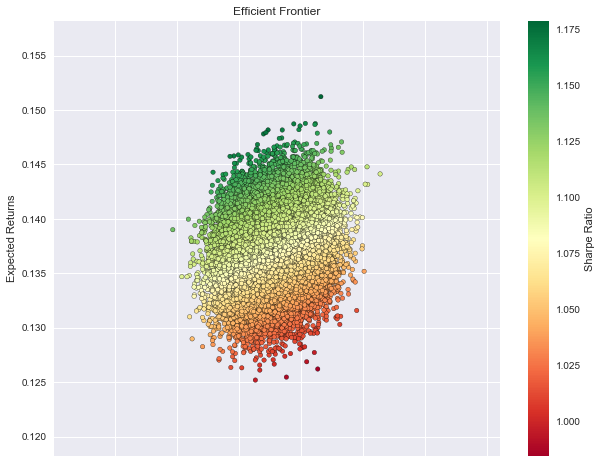

In [170]:
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []
sharpe_ratio=[]

# set the number of combinations for imaginary portfolios
num_assets = len(stock_name)
num_portfolios = 50000

np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(stock_name):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in stock_name]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [171]:
min_volatility=df['Volatility'].min()
max_sharpe=df['Sharpe Ratio'].max()

In [172]:
sharpe_portfolio=df.loc[df['Sharpe Ratio']==max_sharpe]
min_variance_port=df.loc[df['Volatility']==min_volatility]

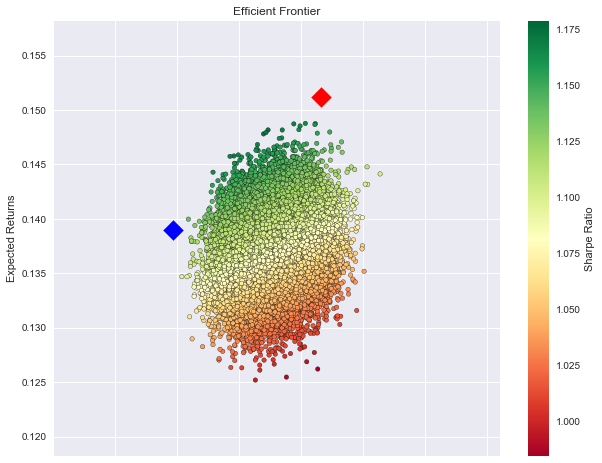

In [173]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)

plt.scatter(x=sharpe_portfolio['Volatility'],y=sharpe_portfolio['Returns'],c='red',marker='D',s=200)
plt.scatter(x=min_variance_port['Volatility'],y=min_variance_port['Returns'],c='blue',marker='D',s=200)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [174]:
min_variance_port

,Returns,Volatility,Sharpe Ratio,AAL Weight,AAPL Weight,AAP Weight,ABBV Weight,ABC Weight,ABT Weight,ACN Weight,...,XLNX Weight,XL Weight,XOM Weight,XRAY Weight,XRX Weight,XYL Weight,YUM Weight,ZBH Weight,ZION Weight,ZTS Weight
23199,0.138998,0.122325,1.136299,0.001768,0.002061,0.003632,0.003002,0.003157,0.002279,0.002597,...,0.004228,0.001227,0.004042,0.004338,0.000457,0.002355,0.001961,0.002898,0.004263,0.00033


In [175]:
sharpe_portfolio

,Returns,Volatility,Sharpe Ratio,AAL Weight,AAPL Weight,AAP Weight,ABBV Weight,ABC Weight,ABT Weight,ACN Weight,...,XLNX Weight,XL Weight,XOM Weight,XRAY Weight,XRX Weight,XYL Weight,YUM Weight,ZBH Weight,ZION Weight,ZTS Weight
5614,0.15122,0.128304,1.178608,0.002476,0.001579,0.000828,0.003124,0.000259,0.00242,0.003605,...,0.003621,0.003697,0.002359,0.002816,0.00066,0.00434,0.003156,0.001548,0.002087,0.002718
